In [64]:
import tweepy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessor

from textblob import TextBlob

In [66]:
# Authenticate
KEY = 'hbIPu0wGt1gqCIiSPmqB48dbW'
SECRET_KEY = 'buwFTDAsZchwZZ5sOU1O5MAmB9Tx4ocJZ60QvLzJqpT6NV34WE'
auth = tweepy.AppAuthHandler(KEY, SECRET_KEY)
api = tweepy.API(auth)

In [73]:
# Setup dataframe
df = pd.DataFrame(columns=['city', 'term', 'tweet', 'time'])

In [74]:
# Gather tweets
terms = ['49ers', 'chiefs', 'superbowl']
cities = ['sf', 'kc']
coords = {'sf': '37.773972,-122.431297,25mi',
          'kc': '39.099724,-94.578331,25mi'}

for city in cities:
    for term in terms:
        for tweet in tweepy.Cursor(api.search,
                                q=term,
                                geocode=coords[city]).items(500):
            df = df.append({'city': city,
                            'term': term,
                            'tweet': tweet.text,
                            'time': tweet.created_at},
                           ignore_index=True)

# Superbowl Sentiment Analysis
#### **Questions**
* What does each city (SanFran, Kansas City) think of their NFL team's Superbowl opponent?
* What does each city think of their own NFL team?
* What are each cities thoughts on the outcome of the game compared to the day before the game?

In [75]:
# Clean tweets
df['tweet'] = df['tweet'].apply(preprocessor.clean)

In [76]:
# Calculate sentiment scores for each tweet and add to dataframe
sentiments = []
subjectives = []
for tweet in df['tweet']:
    scores = TextBlob(tweet).sentiment
    sentiments.append(scores[0])
    subjectives.append(scores[1])

df['sentiment'] = sentiments
df['subjective'] = subjectives

In [88]:
df.loc[(df['city'] == 'sf') & (df['term'] == '49ers')]['sentiment'].mean()

0.22330775643338152

In [89]:
df.loc[(df['city'] == 'sf') & (df['term'] == 'chiefs')]['sentiment'].mean()

0.23948769149831706

In [90]:
df.loc[(df['city'] == 'kc') & (df['term'] == 'chiefs')]['sentiment'].mean()

0.09896148308794793

In [91]:
df.loc[(df['city'] == 'kc') & (df['term'] == '49ers')]['sentiment'].mean()

0.2434718819143816

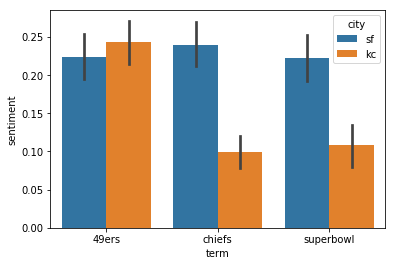

In [92]:
sns.barplot(x='term', y='sentiment', hue='city', data=df)

### Weird Results
Why does Kansas City have a lower sentiment for the Chiefs than the 49ers? The Chiefs are KC's home team and they won.

In [93]:
df_kc = df.loc[df['city'] == 'kc']
df_sf = df.loc[df['city'] == 'sf']

In [94]:
df_kc.sort_values(by='sentiment')

,city,term,tweet,time,sentiment,subjective
2336,kc,chiefs,They hate us 'cause they ain't is! How about t...,2020-02-03 23:36:10,-1.000000,0.900000
1876,kc,49ers,You want to hear something truly annoying........,2020-02-03 16:03:39,-0.800000,0.900000
2375,kc,chiefs,"Despite what I’ve read on Twitter, it is impos...",2020-02-03 23:34:30,-0.666667,1.000000
1513,kc,49ers,Been listening to national sports talk radio a...,2020-02-03 23:26:40,-0.625000,1.000000
1510,kc,49ers,: Been listening to national sports talk radio...,2020-02-03 23:27:54,-0.625000,1.000000
1765,kc,49ers,: This is the moment where ers fucked up.,2020-02-03 17:48:51,-0.600000,0.700000
2597,kc,superbowl,"What an insane hours...KC wins the Superbowl, ...",2020-02-03 22:47:15,-0.566667,0.733333
2991,kc,superbowl,: A sad accident occurred while a fan was cele...,2020-02-03 19:36:29,-0.500000,1.000000
2702,kc,superbowl,Whoops!! Guess you were wrong there buddy. Loo...,2020-02-03 21:54:52,-0.500000,0.900000
2407,kc,chiefs,"If I was ever to feel sorry for and fans, toda...",2020-02-03 23:32:53,-0.500000,1.000000


In [28]:
# Save
df.to_csv('superbowl_tweets.csv')